### axis=0 求均值

In [1]:
import pandas as pd
import numpy as np
empl_df = pd.DataFrame({
    'Name': ["Jon", "Jon", "Mike", "Luna", "Sam", "Aliza"],
    'Age': [30, 33, 35, 30, 30, 31],
    'Weight(KG)': [75, 75, 80, 70, 73, 70],
    'Height(meters)': [1.7, 1.7, 1.85, 1.75, np.nan, 1.75],
    'Salary($)': [3300, 3500, 4000, 3050, np.nan, 3700]
})
print("The Employee DataFrame is:")
print(empl_df,"\n")

print("The DataFrame with mean values of each column is:")
print(empl_df.groupby('Name',axis=0).sum())
print("========================")
print(empl_df.groupby('Name',axis=0).count())
print("========================")
print(empl_df.groupby('Name',axis=0).size())

The Employee DataFrame is:
    Name  Age  Weight(KG)  Height(meters)  Salary($)
0    Jon   30          75            1.70     3300.0
1    Jon   33          75            1.70     3500.0
2   Mike   35          80            1.85     4000.0
3   Luna   30          70            1.75     3050.0
4    Sam   30          73             NaN        NaN
5  Aliza   31          70            1.75     3700.0 

The DataFrame with mean values of each column is:
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza   31          70            1.75     3700.0
Jon     63         150            3.40     6800.0
Luna    30          70            1.75     3050.0
Mike    35          80            1.85     4000.0
Sam     30          73            0.00        0.0
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza    1           1               1          1
Jon      2           2               2          2


In [3]:
import pandas as pd

empl_df = pd.DataFrame({  
    'A': [30, 33, 35, 30, 30, 31],
    'B': [75, 75, 80, 70, 73, 70],
    'C': [80, 90, 75, 83, 97, 66],
    'D': [57, 83, 72, 96, 88, 25]
},index=["Ken","Vivin","Lindy","Iris","Gigi","Lucy"])
print("The Employee DataFrame is:")
print(empl_df,"\n")
mapping_dict = {'A':'Python', 'B':'Python', 'C':'Java', 'D':'C++'}
print("The DataFrame with mean values of each row is:")
print(empl_df.groupby(mapping_dict,axis=1).mean())

The Employee DataFrame is:
        A   B   C   D
Ken    30  75  80  57
Vivin  33  75  90  83
Lindy  35  80  75  72
Iris   30  70  83  96
Gigi   30  73  97  88
Lucy   31  70  66  25 

The DataFrame with mean values of each row is:
        C++  Java  Python
Ken    57.0  80.0    52.5
Vivin  83.0  90.0    54.0
Lindy  72.0  75.0    57.5
Iris   96.0  83.0    50.0
Gigi   88.0  97.0    51.5
Lucy   25.0  66.0    50.5


## 功能聚合與重新採樣
+ 我們可針對數值資料進行各種計算。
+ 聚合代表 .agg( ) 這個動作：
   + 可以整併各種計算為多個 column 輸出。
   + 分組後也可以利用可以進行各組的資料計算。
+ 我們可針對物件進行 resample( ) 動作進行重新採樣，藉此調整日期時間資料的出現頻率。
+ [time offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

### pandas028原型

In [4]:
import pandas as pd
df = pd.read_csv('salesv3.csv',encoding="utf-8")
df["date"] = pd.to_datetime(df['date'])
print(df.head( ))
print("-------------")

   account number                         name       sku  quantity  \
0          740150                   Barton LLC  B1-20000        39   
1          714466              Trantow-Barrows  S2-77896        -1   
2          218895                    Kulas Inc  B1-69924        23   
3          307599  Kassulke, Ondricka and Metz  S1-65481        41   
4          412290                Jerde-Hilpert  S2-34077         6   

   unit price  ext price                date  
0       86.69    3380.91 2014-01-01 07:21:51  
1       63.16     -63.16 2014-01-01 10:00:47  
2       90.70    2086.10 2014-01-01 13:24:58  
3       21.05     863.05 2014-01-01 15:05:22  
4       83.21     499.26 2014-01-01 23:26:55  
-------------


In [6]:
import pandas028
a=pandas028.df.set_index('date').resample('M')["ext price"].sum( ) #日期重新採樣 使用(M)月結點
print(a)
print("-------------")
b=pandas028.df.set_index('date').groupby('name')["ext price"].resample("M").sum()
print(b)
c=pandas028.df.set_index('date').groupby('name')["ext price"].resample("A-DEC").sum()#表示12月作為結束的一整年
print(c)

date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext price, dtype: float64
-------------
name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64
name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-

### 功能聚合

In [7]:
import pandas028
a=pandas028.df[["ext price", "quantity"]].sum( )
b=pandas028.df["unit price"].mean( )
print(a)
print("-----------")
print(b)
print("-----------")
c=pandas028.df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean']) # 希望同時計算 sum 與 mean
print(c)
print("-----------")

ext price    2018784.32
quantity       36463.00
dtype: float64
-----------
55.00752666666659
-----------
         ext price      quantity    unit price
sum   2.018784e+06  36463.000000  82511.290000
mean  1.345856e+03     24.308667     55.007527
-----------


### value_counts 統計出現次數

In [8]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': [1, 2, 3, np.nan, 3],
                   'Y': [4, np.nan, 8, np.nan, 3]})
print("DataFrame:")
print(df)
absolute_counts=df["X"].value_counts()
absolute_counts_nan=df["X"].value_counts(dropna=False)#表示顯示nan的出現次數 預設為True不顯示nan
print("Frequencies of elements of X column:")
print(absolute_counts)
print(absolute_counts_nan)
print(absolute_counts.index[0]) # 取得出現頻率最高的

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Frequencies of elements of X column:
3.0    2
1.0    1
2.0    1
Name: X, dtype: int64
3.0    2
1.0    1
2.0    1
NaN    1
Name: X, dtype: int64
3.0


In [9]:
import pandas028
## sku 產品統一編號
## 分別設定不同欄位做甚麼
a=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})
get_max = lambda x: x.value_counts(dropna=False).index[0]
b=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(a)
print("-----------")
print(b)
print("-----------")
get_max.__name__ = "most frequent" #設定名稱為most frequent
c=pandas028.df.agg({'ext price': ['sum', 'mean',get_max], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(c)
print("-----------")

         ext price      quantity  unit price
sum   2.018784e+06  36463.000000         NaN
mean  1.345856e+03     24.308667   55.007527
-----------
             ext price      quantity  unit price       sku
sum       2.018784e+06  36463.000000         NaN       NaN
mean      1.345856e+03     24.308667   55.007527       NaN
<lambda>           NaN           NaN         NaN  S2-77896
-----------
                  ext price      quantity  unit price       sku
sum            2.018784e+06  36463.000000         NaN       NaN
mean           1.345856e+03     24.308667   55.007527       NaN
most frequent  1.484000e+03           NaN         NaN  S2-77896
-----------


In [10]:
import pandas027
import numpy as np
print(pandas027.df)
grouped = pandas027.df.groupby('Team')
print(type(grouped))
print("===========================")
print(grouped.first())
print("===========================")
print(grouped.agg("size"))#注意有小寫kings
print(grouped.agg(np.size))#每個欄位都填上相對應的size
print(grouped.agg(lambda x:np.size(x)))

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings

In [21]:
import pandas027
import numpy as np
grouped = pandas027.df.groupby('Team')
print(grouped.first())
print(grouped['Points'].agg([np.sum, np.mean, np.std]))

        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
         sum  amax         std
Team                          
Devils  1536   863  134.350288
Kings   2285   788   24.006943
Riders  3049   876   88.567771
Royals  1505   804   72.831998
kings    812   812         NaN


# 刪除與修改取代資料

In [20]:
import pandas as pd
filterList = ['年度','經常性薪資-女/男','專業人員-女/男','技術員及助理專業人員-女/男','事務支援人員-女/男',
 '服務及銷售工作人員-女/男','技藝_機械設備操作及組裝人員-女/男','基層技術工及勞力工-女/男']
data = pd.read_csv('HW18__Data.csv')
data.drop(columns=filterList,inplace=True)#inplace=True 可修改原始資 移除filterList的欄位
data.replace(to_replace=r"…|—",value="0",regex=True,inplace=True)#...或- 換成0
data.rename(columns={'經常性薪資-薪資': '經常性',
'專業人員-薪資': '專業人員',
'技術員及助理專業人員-薪資': '技術員及助理',
'事務支援人員-薪資': '事務人員',
'服務及銷售工作人員-薪資': '服務銷售',
'技藝_機械設備操作及組裝人員-薪資': '機械設備操作',
'基層技術工及勞力工-薪資': '基層勞力'},inplace=True)
print(data.head())

         行業別    經常性   專業人員 技術員及助理   事務人員   服務銷售 機械設備操作   基層勞力
0   工業及服務業部門  27055  34003  28646  26068  25012  25338  22824
1       工業部門  26860  33788  28103  25906  25811  24919  22784
2   礦業及土石採取業  26170  35768  27744  23441  23625  26988  22440
3   石油及天然氣礦業  27696  37125  25313  23625  23625  23625      0
4  砂、石及黏土採取業  25661  30000  29185  23405      0  27629  22440


# 資料合併 

## 資料合併 
+ merge( ) 方法可作為 DataFrame 對象之間的連結方式。
 + 裡面必須加入的參數為兩個 DataFrame 對象。
 + on 這個參數指的是用於連接的 Column 索引名稱。
   + 必須存在左右兩個 DataFrame 對象中，如果沒有指定且其他參數也未指定則以兩個 DataFrame 的列名交集做為連接鍵。
   + 如果指定的 Column 於兩個 DataFrame 上的名稱不同，則可以透過 left_on 與 right_on 兩個參數分別指定。
 + how( ) 這個參數是指左右兩個對象中存在不重合的鍵合併連接的方式：
   + inner：預設，代表交集 (內連接)。
   + outer：代表並集 (外連接)。
   + left：代表左外連接。
   + right：代表右外連接。
   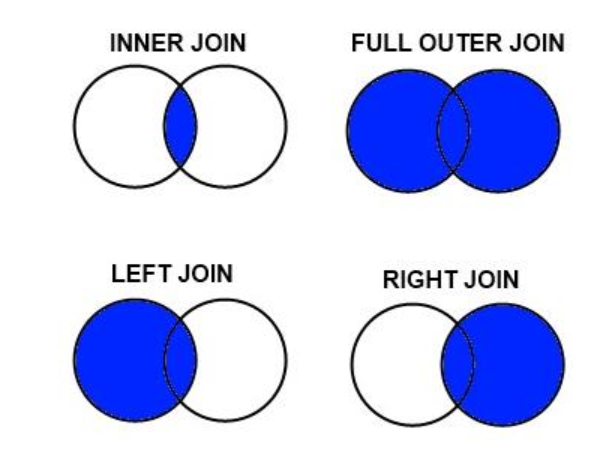

### 資料合併的原始資料

In [22]:
import pandas as pd
left = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5
--------------------
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5
--------------------


In [23]:
import pandas030
pd1=pandas030.pd
left1=pandas030.left
right1=pandas030.right
print("--------id------------")
print(pd1.merge(left1,right1,on='id')) #使用id做合併
print("----------'id','subject_id----------")
print(pd1.merge(left1,right1,on=['id','subject_id'])) #id一樣的 且 subject_id也一樣的做合併
print("---------left-----------")
print(pd1.merge(left1,right1, on='subject_id', how='left')) #以left資料為主 sub1在right 資料缺少所以Nan
print("-----------right---------")
print(pd1.merge(left1,right1, on='subject_id', how='right')) #以Right資料為主 sub3在left 資料缺少所以Nan
print("---------outer-----------")
print(pd1.merge(left1,right1, how='outer', on='subject_id')) # Right or left有的都可以
print("---------inner-----------")
print(pd1.merge(left1,right1, on='subject_id', how='inner'))# Right and left 的subject_id 必須一樣
print("--------------------")
print(pd1.merge(left1,right1,on=['subject_id'])) 

--------id------------
   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
----------'id','subject_id----------
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty
---------left-----------
   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty
-----------right---------
   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   NaN     NaN       sub3     3   Bran
3   4.0   Alice       sub6     4  Bryce
4   5.0  Ayoung       sub5     5  Betty
---------outer-----------
   id

## 資料合併的欄位名稱不同

In [24]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject1':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject2':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")
print(pd.merge(left,right,left_on="subject1",right_on="subject2" , how='left')) #因為名稱不一樣 需特別指定left_on 與 right_on
# 因為指定left所以left全都顯示 right只顯示與left共有的一部分 如無資料顯示NaN
print("--------------------")

   id    Name subject1
0   1    Alex     sub1
1   2     Amy     sub2
2   3   Allen     sub4
3   4   Alice     sub6
4   5  Ayoung     sub5
--------------------
   id   Name subject2
0   1  Billy     sub2
1   2  Brian     sub4
2   3   Bran     sub3
3   4  Bryce     sub6
4   5  Betty     sub5
--------------------
   id_x  Name_x subject1  id_y Name_y subject2
0     1    Alex     sub1   NaN    NaN      NaN
1     2     Amy     sub2   1.0  Billy     sub2
2     3   Allen     sub4   2.0  Brian     sub4
3     4   Alice     sub6   4.0  Bryce     sub6
4     5  Ayoung     sub5   5.0  Betty     sub5
--------------------


# 資料連結

+ Pandas 的 concat 方法可以做到兩個資料的 Rows (預設) 的連結。
+ 預設參數：
  + 連結的 Series 或 DataFrame 物件。
  + axis：預設為 0，這是要連接的軸。
  + join：預設為 outer，亦可選擇 inner。
  + ignore_index：預設為 False。如果為 True，請不要在連接軸上使用索引值。


## 資料連結的原始資料

In [25]:
import pandas as pd
one = pd.DataFrame({ 'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5'],
         'Marks_scored':[98,90,87,69,78]},
         index=[1,2,3,4,5])
two = pd.DataFrame({  'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5'],
         'Marks_scored':[89,80,79,97,88]},
         index=[1,2,3,4,5])
print(one)
print("--------------------")
print(two)
print("--------------------")


     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
--------------------
    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88
--------------------


In [26]:
import pandas031
pd1=pandas031.pd
one1=pandas031.one
two1=pandas031.two
pd2=pd1.concat([one1,two1])## axis=0
print(pd2)
print("--------------------")
pd3=pd1.concat([one1,two1],keys=['one-x','two-y'])##建立階層式索引 最外層的Key
print(pd3)
print("--------------------")
pd4=pd1.concat([one1,two1],ignore_index=True) #不使用之前的index
print(pd4)
print("--------------------")
pd5=pd1.concat([one1,two1],axis=1)
print(pd5)
print("--------------------")

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
--------------------
    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88
--------------------
     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
1   Billy       sub2            89
2   Brian       sub4            80
3    Bran       sub3            79
4   Bryce       sub6            97
5   Betty       sub5            88
--------------------
           Name subject_id  Marks_scored
one-x 1    Alex       sub1            98
      2     Amy       sub2            90
      3   Allen

# 轉換與過濾
+ 轉換：
  + Group 或 column 可以透過 transform 函數進行轉換，返回索引的對象的大小與被分組的大小相同。
+ 過濾：
  + 依據 filter( ) 函數進行篩選與過濾的動作並傳回資料。

In [27]:
import pandas as pd
pl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders','LuLu'],
         'Rank': [1, 2, 2, 3, 3,4 ,1,1,2,4,1,2,4],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017,2018],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690,700]}
df = pd.DataFrame(pl_data)
print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
12    LuLu     4  2018     700


## 選組與聚合

In [28]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Year')
print (grouped.get_group(2017))
print ("=================================")
grouped = df1.df.groupby('Year')
print(grouped['Points'].agg(np.mean))
print(grouped['Points'].agg("mean"))
print ("=================================")
grouped2 = df1.df.groupby('Team')
print(grouped2.agg(np.size))
print ("=================================")
print(grouped2['Points'].agg([np.sum, np.mean, np.std]))

      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      4     4       4
Riders     4     4       4
Royals     2     2       2
         sum    mean         std
Team                            
Devils  1536  768.00  134.350288
Kings   3097  774.25   31.899582
Riders  3049  762.25   88.567771
Royals  1505  752.50   72.831998


## 轉換與過濾

In [29]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Team')
print (df1.df)
print ("==================")
print (grouped.first())#取得每個群組的第一個值
print ("==================")
score = lambda x: x*10
print (grouped.transform(score))
print ("==================")
print (df1.df.groupby('Team').filter(lambda x: len(x) >= 3)) #群組的字串長度大於等於3才出現

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
    Rank   Year  Points
0     10  20140    8760
1     20  20150    7890
2     20  20140    8630
3     30  20150    6730
4     30  20140    7410
5     40  20150    8120
6     10  20160    7560
7     10  20170    7880
8     20  20160    6940
9     40  20140    7010
10    10  20150    8040
11    20  20170    6900
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
4    Kings     3  2014     741

# 進階圖表功能
+ pandas 內附簡易的 matplot 繪圖工具，可以讓您方便快速產生結果，但如果您的環境內已經執行 matplot，那 pandas 的圖表也必須透過 matplot 的物件執行 show 方式才能呈現。
+ 折線圖是最基本產生圖表的方式。

                   A         B         C         D
2018-01-01  0.255678 -0.088818 -0.186497  1.660076
2018-01-02 -0.230908 -0.152271 -0.041978 -1.045393
2018-01-03 -0.603744 -0.210614 -0.386076 -0.053158
2018-01-04  1.293183  0.504728  0.188476 -0.543916
2018-01-05 -0.512038  0.178635 -0.521160 -1.740956
2018-01-06 -0.015876 -0.435428  0.337199 -1.074047
2018-01-07  0.652204  1.181185  0.001841  0.539504
2018-01-08 -0.098302 -0.949807 -1.654900 -1.031703
2018-01-09  0.593431 -0.815795  0.024313  0.561115
2018-01-10  1.258855  0.894809  0.210786  0.867909


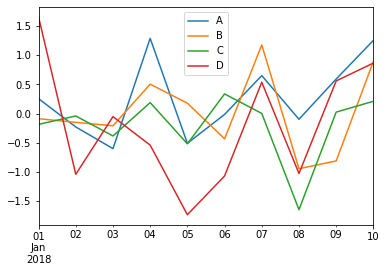

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## np.random.randn(10,4) 10x4 ndarray 內容為亂數
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2018',periods=10), columns=list('ABCD'))
print(df)
df.plot( )
plt.show( )

## 進階圖表-兩條曲線

           population       area
London        8615246  1572000.0
Berlin        3562166   891850.0
Madrid        3165235   605770.0
Rome          2874038  1285000.0
Paris         2273305   105400.0
Vienna        1805681   414600.0
Bucharest     1803425   228000.0
Hamburg       1760433   755000.0
Budapest      1754000   525200.0
Warsaw        1740119   517000.0
Barcelona     1602386   101900.0
Munich        1493900   310400.0
Milan         1350680   181800.0


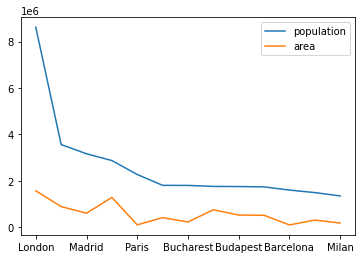

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                   "Paris", "Vienna", "Bucharest", "Hamburg",
                   "Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,1350680],
          "area" : [1572, 891.85, 605.77, 1285,
                    105.4, 414.6, 228, 755, 525.2, 517, 101.9, 310.4,181.8]
}
city_frame = pd.DataFrame(cities, columns=["population", "area"],index=cities["name"])
city_frame["area"] *= 1000
print(city_frame)
city_frame.plot( )
plt.show()

# 子圖表 (1)
+ 一個 Figure 對象可以包含多個子圖 (Axes)，預設三個參數：
  + num_rows：幾個 rows。
  + num_cols：幾個 columns。
  + plot_num：代表第幾張圖表。
+ 然後按照從左到右，從上到下的順序對每個子區域進行編號，左上的子區域的編號為 1。
+ Plot_num 參數指定創建的 Axes 對象所在的區域。
+ 如果 numRows ＝ 2、numCols ＝ 3，那整個繪製圖表樣式為 2×3 的圖片區域,用坐標表示為
  + (1, 1), (1, 2), (1, 3)
  + (2, 1), (2, 2), (2, 3)
+ 當 plotNum ＝ 3 時,表示的坐標為 (1, 3)，即第一 row 第三 column 的子圖。
+ 如果 numRows、numCols 和 plotNum 這三個數都小於 10 的話，可以把它們縮寫為一個整數，例如 subplot(232) 和 subplot(2,3,2) 是相同的。
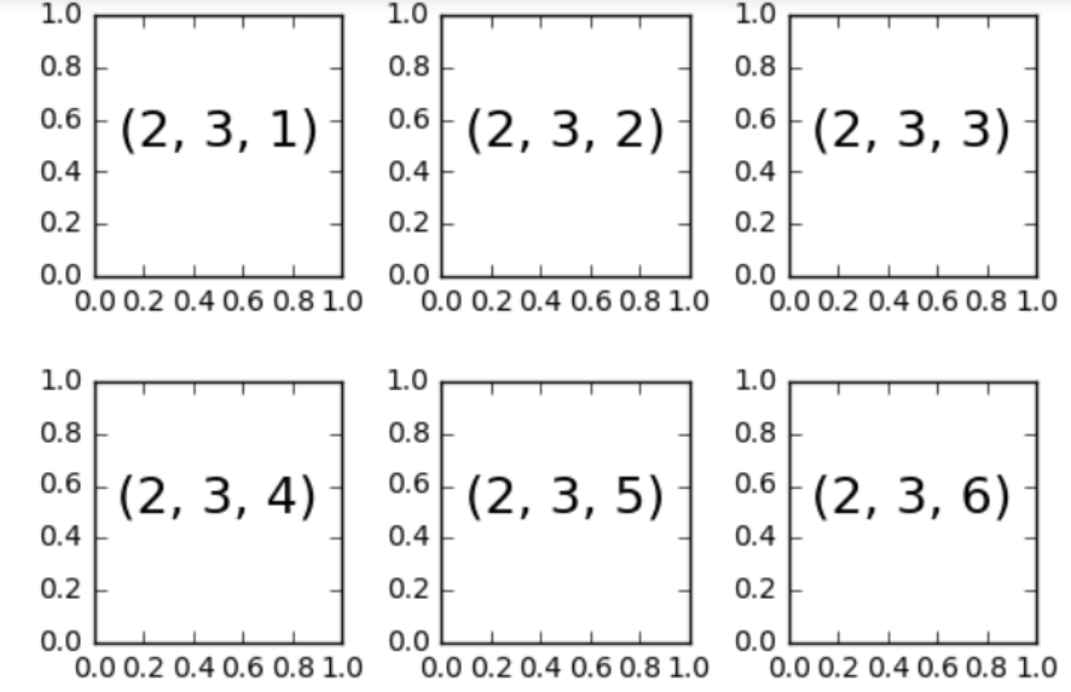

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


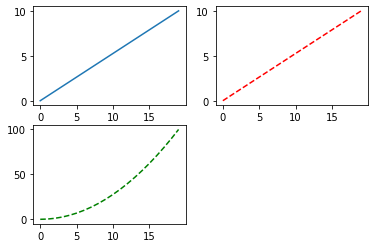

In [33]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
print(t)
print(s)
# 左往右數第幾張
plt.subplot(2, 2, 1) #產生2 x 2的圖表 第1張
plt.plot(t, s)
plt.subplot(2, 2, 2)#產生2 x 2的圖表 第2張
plt.plot(t, s, 'r--')
plt.subplot(223)#產生2 x 1的圖表 第3張
plt.plot(t, s**2, 'g--')
plt.show()

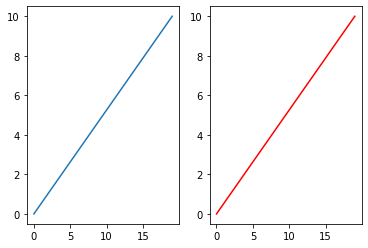

In [34]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
plt.subplot(1, 2, 1)#一共2張 其中的第一張
plt.plot(t, s)
plt.subplot(1, 2, 2)#一共2張 其中的第二張
plt.plot(t, s, 'r-')
plt.show()